<a href="https://colab.research.google.com/github/hhaemin/computer_vision/blob/main/Hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hough line transform

Edge 영상에서 Edge중 특정한 모양(직선, 원, 타원)을 찾아내는 알고리즘


https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

English:
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html


Korean:
https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html

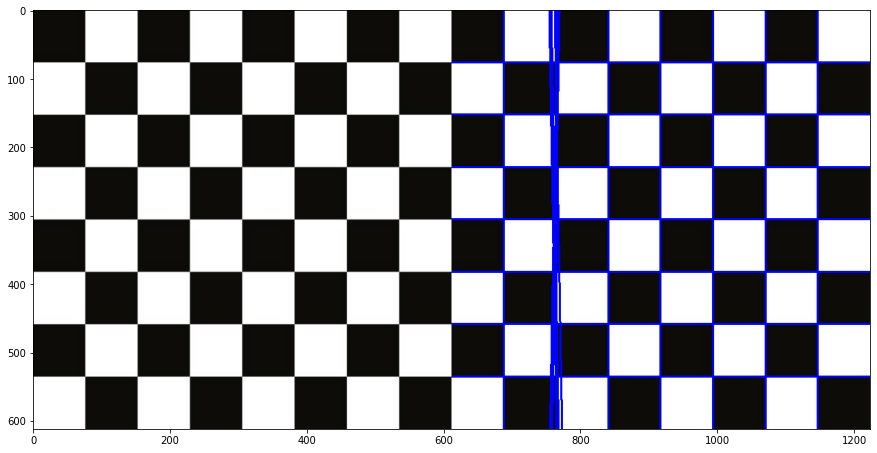

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('chessboard.jpg')
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)

for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

res = np.hstack((img_original,img))

plt.figure(figsize=(15,8))
plt.imshow(res)

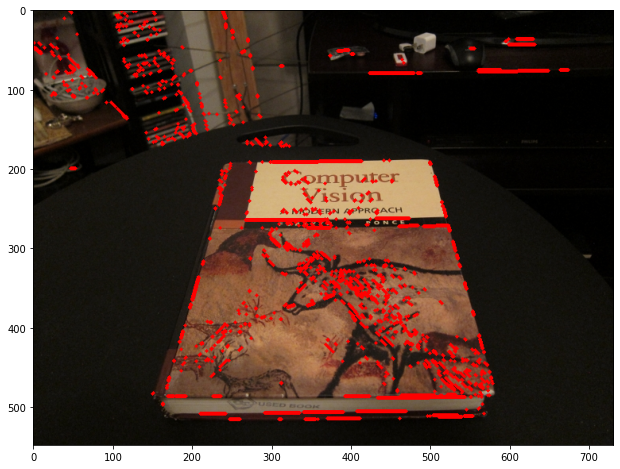

In [2]:
import cv2
import numpy as np

img = cv2.imread('cv_desk.png')
edges = cv2.Canny(img,50,200,apertureSize = 3)
gray = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
minLineLength = 100
maxLineGap = 0

lines = cv2.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()
# plt.imshow(edges)